### Frequency-domain analysis workflow

This workbook contains a workflow to:
1. Explore the frequency-domain fetures of a sample building electric load profile
2. Cluster the load profiles with frequency domain features 

#### Part 0. Set the paths and import the modules needed for this workflow, descriptions of each module can be find in the README.md

In [1]:
# Run this cell only at the first kernel starts
%cd ..

import os
dir_root = %pwd
dir_example = os.path.join(dir_root, "example")
dir_test = os.path.join(dir_root, "tests")
dir_results = os.path.join(dir_root, "results", 'LBNL_Case_1')

from EULP.LP_explorations import LoadProfileExplorations
from EULP.LP_frequency_domain import LoadProfileFrequencyDomain
from EULP.LP_clustering import LoadProfileCluster

/mnt/c/Users/hlee9/Documents/GitHub/DOE_EULP/pkg/EULP


/root/miniconda3/envs/JPTR/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Part 1. Explore the frequency-domain fetures of a sample building electric load profile

First, we create a LoadProfileMetrics instance from the sample dataframe, and take a look at the data.

In [2]:
import pandas as pd
df_sample = pd.read_csv(os.path.join(dir_example, 'data', 'sample.csv'))
lp_f = LoadProfileFrequencyDomain(df_sample)
lp_f.scale('Value', 0, 1)
print(lp_f)


--------------------------------------------------
Load profile between 7/30/2014 0:00 and 7/30/2016 23:45
------------------------------
Top 10 rows:
         Datetime     Value
0  7/30/2014 0:00  0.436189
1  7/30/2014 0:15  0.144474
2  7/30/2014 0:30  0.059231
3  7/30/2014 0:45  0.014092
4  7/30/2014 1:00  0.058048
5  7/30/2014 1:15  0.209871
6  7/30/2014 1:30  0.703102
7  7/30/2014 1:45  0.041681
8  7/30/2014 2:00  0.324800
9  7/30/2014 2:15  0.474346
------------------------------
Summary:
               Value
count  70272.000000
mean       0.498595
std        0.289229
min        0.000010
25%        0.247614
50%        0.497791
75%        0.749121
max        0.999946
--------------------------------------------------


Get frequency-domain features at daily window level.

In [3]:
# lp_m.get_fft_w_window(df_sample, get_bins=False, year=2015)

The Dicrete Fourier Transform (DFT) of a daily load profile (15-min interval, 96 timestamps in total) may yield a spectrum with the frequency ranging from 0.5 hour to 12 hour. However, different load profiles may have different peaks in the spectrums. Creating bins of frequencies allows us to group various spectrum peaks. First, we're going to explore the load profiles' variations within each day. 

In [4]:
df_daily_bins = lp_f.get_fft_w_window(df_sample, get_bins=True, year=2015)
df_daily_bins

,Date,0.5hr ~ 0.75hr,0.75hr ~ 1hr,1hr ~ 1.25hr,1.25hr ~ 1.5hr,1.5hr ~ 1.75hr,1.75hr ~ 2hr,2hr ~ 4hr,4hr ~ 8hr,8hr ~ 12hr
0,2015-01-01,0.560095,0.214315,0.133605,0.135828,0.063123,0.081161,0.256065,0.058384,0.037455
0,2015-01-02,0.383927,0.323965,0.117577,0.119553,0.079034,0.139508,0.114701,0.133024,0.063681
0,2015-01-05,0.527714,0.211221,0.083400,0.182671,0.061812,0.024930,0.191873,0.204868,0.027339
0,2015-01-06,0.323716,0.232742,0.152681,0.053539,0.091343,0.051652,0.319234,0.079447,0.030487
0,2015-01-07,0.652069,0.381599,0.071459,0.074471,0.088546,0.067618,0.128557,0.083108,0.030028
...,...,...,...,...,...,...,...,...,...,...
0,2015-12-25,0.529132,0.234944,0.140971,0.115603,0.029428,0.047798,0.158764,0.107341,0.010415
0,2015-12-28,0.574101,0.208981,0.108214,0.109460,0.052160,0.062960,0.190028,0.160352,0.023114
0,2015-12-29,0.396542,0.213972,0.146251,0.087010,0.061767,0.095723,0.170710,0.099080,0.022520
0,2015-12-30,0.607827,0.233111,0.123146,0.092385,0.051692,0.044001,0.268461,0.051793,0.005566


This is how the frequency spectrum bins distribution look like for the example building.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


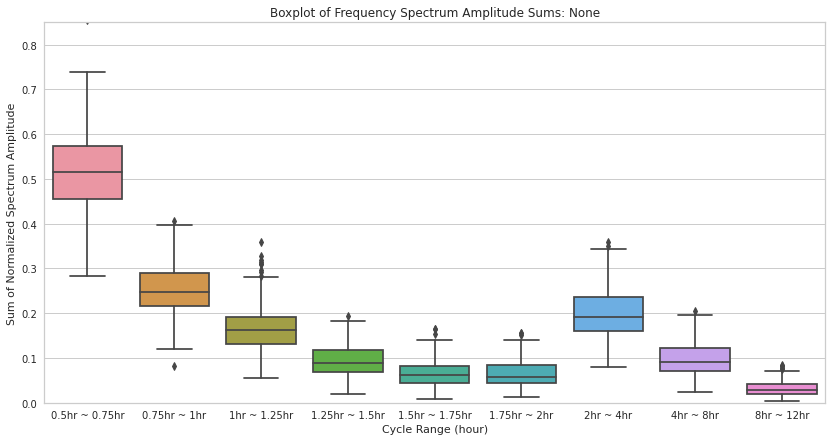

In [5]:
lp_f.daily_fft_sum_bins_boxplot(df_daily_bins.iloc[:,1:])

#### Part 2. K-Means clustering with frequency-domain features

Next, we can conduct k-means clustering with the frequency bin features. 
+ Prepare the clustering input data
+ Find the optimal number of clusters
+ Get the silhouette plot

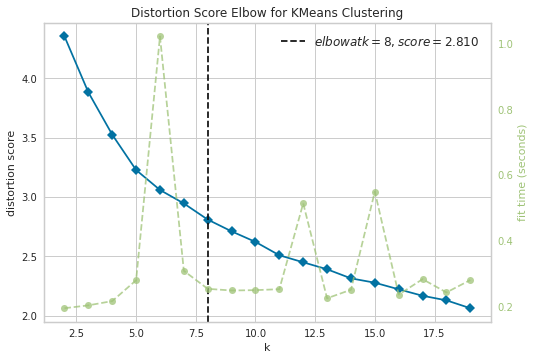

In [ ]:
lp_cluster = (LoadProfileCluster)
cluster_in_data = lp_cluster.prepare_kmeans_data(df_daily_bins.iloc[:,1:], standardize_features=False)

# Use elbow method to select the optimal k. (available metrics: distortion, silhouette, calinski_harabasz)
elbow_k, elbow_metric = lp_cluster.kmeans_elbow_plot(cluster_in_data, k_max=20, metric='distortion', dir_save=os.path.join(dir_results, 'frequency_elbow.png'))
# Plot the silhouette chart
lp_cluster.kmeans_silhouette_plot(cluster_in_data, k=elbow_k, dir_save=os.path.join(dir_results, 'frequency_silhouette.png'))